In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_env import EvidenceEnv

Part 1

In [2]:
class RandomAgent(object):
    def __init__(self, env):
        """
        Args:
        env: an environment
        """
        self.env = env
        
    def act(self, observation):
        """
        Act based on observation and train agent on cumulated reward (return)
        :param
        observation: new observation
        :param
        reward: reward gained from previous action; None indicates no reward because of initial state
        :return
        : action (Variable)
        """
        return np.random.choice(self.env.n_action)
    
    def train(self, a, old_obs, r, new_obs):
        """
        :param
        a: action
        :param
        old_obs: old observation
        :param
        r: reward
        :param
        new_obs: new observation
        :return
        :
        """
        pass

In [3]:
# Number of iterations
n_iter = 1000
# environment specs
env = EvidenceEnv(n=2,p=0.95)
# define agent
agent = RandomAgent(env)
# reset environment and agent
obs = env.reset()
reward = None
done = False
R = []
for step in range(n_iter):
    env.render()
    action = agent.act(obs)
    _obs, reward, done, _ = env.step(action)
    # no training involved for random agent
    agent.train(action, obs, reward, _obs)
    obs = _obs
    R.append(reward)

1
0
1
1
1
0
1
0
1
0
0
1
1
0
0
1
0
0
0
1
1
1
1
0
1
0
1
1
0
1
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
0
1
0
1
1
1
0
1
0
1
1
0
0
1
0
0
1
1
0
1
1
1
0
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
1
1
0
1
0
1
1
1
0
0
0
0
1
0
0
1
0
1
0
1
0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
1
1
0
1
1
1
1
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
1
1
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
1
1
1
0
0
1
1
0
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
0
0
0
1
1
1
0
1
1
0
0
1
0
0
0
0
1
0
1
0
1
1
1
1
0
0
1
0
0
1
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
1
0
1
0
1


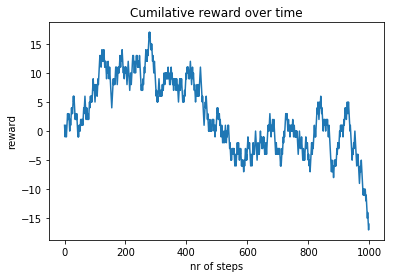

In [4]:
plt.xlabel('nr of steps')
plt.ylabel('reward')
timestep = range(0,np.size(R))
plt.plot(timestep,np.cumsum(R))
plt.title('Cumilative reward over time')
plt.show()

Part 2

In [5]:
class TabularQAgent(object):
    def __init__(self, env):
        """
        Args:
        env: an environment
        """
        self.env = env
        self.Q = np.random.uniform(size=[4,2])
        self.y = 0.9
        self.lr = 0.9
        
    def act(self, observation):
        """
        Act based on observation and train agent on cumulated reward (return)
        :param
        observation: new observation
        :param
        reward: reward gained from previous action; None indicates no reward because of initial state
        :return
        : action (Variable)
        """
        return np.argmax(self.Q[self.env.asint(observation)])
    
    def train(self, a, old_obs, r, new_obs):
        """
        :param
        a: action
        :param
        old_obs: old observation
        :param
        r: reward
        :param
        new_obs: new observation
        :return
        :
        """
        new_obsi = self.env.asint(new_obs)
        old_obsi = self.env.asint(old_obs)
        Qbell = self.Q[old_obsi,a] + self.lr * (r + self.y * max(self.Q[new_obsi]) - self.Q[old_obsi,a])
        self.Q[old_obsi,a] = Qbell
        pass
    
    def plotQ(self):
        plt.matshow(self.Q)
        plt.xlabel('action')
        plt.ylabel('state')
        plt.title('Q values')
        plt.show()
        pass

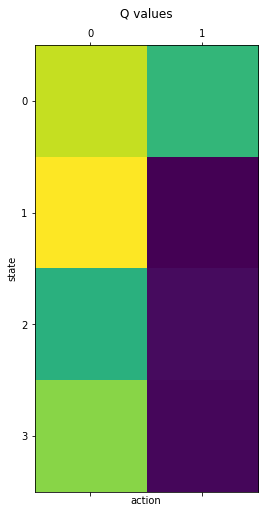

In [6]:
# Number of iterations
n_iter = 1000
# environment specs
env = EvidenceEnv(n=2,p=0.95)
# define agent
agent = TabularQAgent(env)
# reset environment and agent
obs = env.reset()
agent.plotQ()

In [7]:
reward = None
done = False
R = []
for step in range(n_iter):
    env.render()
    action = agent.act(obs)
    _obs, reward, done, _ = env.step(action)
    # no training involved for random agent
    agent.train(action, obs, reward, _obs)
    obs = _obs
    R.append(reward)

0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
1
0
1
0
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0
0
1
1
1
1
0
1
0
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
1
1
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
1
1
0
1
0
1
1
1
0
1
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
0
1
1
0
0
0
0
0
1
1
0
0
1
1
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
0
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
0
0
1
0
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
0
0
0
1
0
1
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
1
0
1
1
1
0
0
0
0


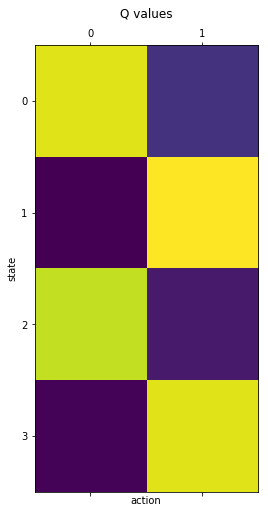

In [8]:
agent.plotQ()

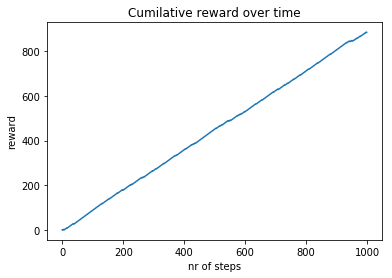

In [9]:
plt.xlabel('nr of steps')
plt.ylabel('reward')
timestep = range(0,np.size(R))
plt.plot(timestep,np.cumsum(R))
plt.title('Cumilative reward over time')
plt.show()

Part 3

In [10]:
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
import random

In [11]:
class MLP(Chain):
    def __init__(self, n_units, n_out):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1 = L.Linear(None, n_units)
            self.l2 = L.Linear(None, n_out)

    def __call__(self, x):
        h = F.sigmoid(self.l1(x))
        y = self.l2(h)
        return y

In [12]:
class Qpredictor(Chain):
    def __init__(self, predictor):
        super(Qpredictor, self).__init__()
        with self.init_scope():
            self.predictor = predictor

    def __call__(self, s, a):
        y = self.predictor(x)
        print(y)
        return y[a]

In [52]:
class NeuralQAgent(object):
    def __init__(self, env):
        """
        Args:
        env: an environment
        """
        self.env = env
        self.model = MLP(n_units=10, n_out=2)
        #self.Q = Qpredictor(self.model)
        self.optimizer = optimizers.SGD()
        self.optimizer.setup(self.model)
        self.D = []
        self.y = 0.9
        self.e = 1
        
    def act(self, observation):
        """
        Act based on observation and train agent on cumulated reward (return)
        :param
        observation: new observation
        :param
        reward: reward gained from previous action; None indicates no reward because of initial state
        :return
        : action (Variable)
        """
        if np.random.uniform() < self.e:
            return np.random.choice(self.env.n_action)
        else:
            return np.argmax(self.model(np.array([observation]).astype('float32')).data[0])
    
    def train(self, a, old_obs, r, new_obs):
        """
        :param
        a: action
        :param
        old_obs: old observation
        :param
        r: reward
        :param
        new_obs: new observation
        :return
        :
        """
        #store experience in replay memory D
        self.D.append((old_obs, a, r, new_obs))
        k = min(50, len(self.D))
        samples = random.sample(self.D, k)
        ss = np.array([np.array(sample[0]).astype('float32') for sample in samples])
        aa = np.array([sample[1] for sample in samples])
        rr = np.array([sample[2] for sample in samples])
        sn = np.array([np.array(sample[3]).astype('float32') for sample in samples])
        print(self.model(sn).data)
        tt = np.array([rr + self.y * self.model(sn).data.max(axis=1)]).astype('float32')
        
        loss = F.squared_error(tt, self.model(ss))
        self.model.cleargrads()
        loss.backward()
        self.optimizer.update()
        self.e = self.e * 0.9977
        pass
    
    def plotQ(self):
        Q = [self.model(np.array([[i,j]]).astype('float32')).data[0] for i in range(2) for j in range(2)]
        plt.matshow(Q)
        plt.xlabel('action')
        plt.ylabel('state')
        plt.title('Q values')
        plt.show()
        pass

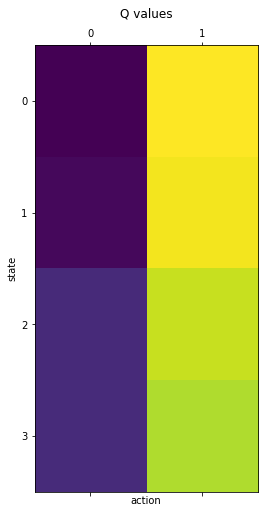

In [53]:
# Number of iterations
n_iter = 1000
# environment specs
env = EvidenceEnv(n=2,p=0.95)
# define agent
agent = NeuralQAgent(env)
# reset environment and agent
obs = env.reset()
agent.plotQ()

In [54]:
reward = None
done = False
R = []
for step in range(n_iter):
    env.render()
    action = agent.act(obs)
    _obs, reward, done, _ = env.step(action)
    agent.train(action, obs, reward, _obs)
    obs = _obs
    R.append(reward)

0
[[ 0.00780021  0.44973394]]


InvalidType: 
Invalid operation is performed in: SquaredError (Forward)

Expect: in_types[0].shape == in_types[1].shape
Actual: (1, 1) != (1, 2)

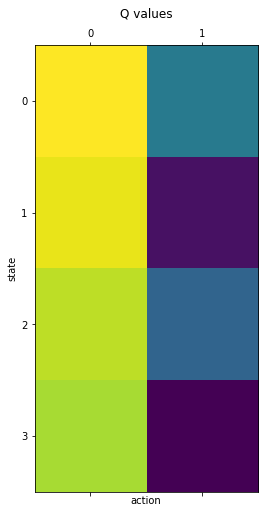

In [45]:
agent.plotQ()

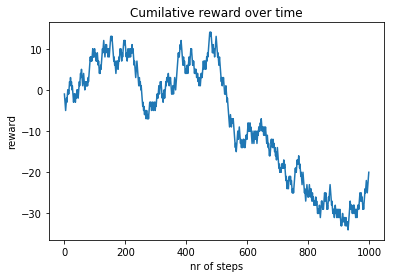

In [17]:
plt.xlabel('nr of steps')
plt.ylabel('reward')
timestep = range(0,np.size(R))
plt.plot(timestep,np.cumsum(R))
plt.title('Cumilative reward over time')
plt.show()